In [2]:
import pandas as pd
import numpy as np
import ast
df = pd.read_csv("balloon-data.csv")
df.head()

,fname,height,width,bbox,num_balloons
0,34020010494_e5cb88e1c4_k.jpg,1536,2048,"[{'xmin': 994, 'ymin': 619, 'xmax': 1445, 'yma...",1
1,25899693952_7c8b8b9edc_k.jpg,1365,2048,"[{'xmin': 135, 'ymin': 115, 'xmax': 811, 'ymax...",1
2,24362039530_b151b41a52_k.jpg,2048,1536,"[{'xmin': 579, 'ymin': 487, 'xmax': 920, 'ymax...",1
3,18849792632_aad23ad513_k.jpg,2048,1536,"[{'xmin': 534, 'ymin': 365, 'xmax': 871, 'ymax...",10
4,17178818589_16e58fc1e5_k.jpg,1536,2048,"[{'xmin': 748, 'ymin': 195, 'xmax': 1425, 'yma...",7


In [3]:
yolo_list = ['class_id', 'x_center', 'y_center', 'bbox_w', 'bbox_h']
for i in range(len(df)):   
    row = df.iloc[i]
    bb = ast.literal_eval(row['bbox'])
    fname = row["fname"]
    image_id = fname.split('.')[0]
    height = row["height"]
    width = row["width"]
    
    bbdf = pd.DataFrame(bb)
    bbdf["bbox_h"] = bbdf["ymax"]-bbdf["ymin"]
    bbdf["bbox_w"] = bbdf["xmax"]-bbdf["xmin"]
    bbdf["x_center"] = bbdf["xmin"] + (bbdf["bbox_w"]/2)
    bbdf["y_center"] = bbdf["ymin"] + (bbdf["bbox_h"]/2)
    bbdf["x_center"] = bbdf["x_center"]/width
    bbdf["y_center"] = bbdf["y_center"]/height
    bbdf["bbox_w"] =bbdf["bbox_w"]/width
    bbdf["bbox_h"] =bbdf["bbox_h"]/height
    bbdf["class_id"] = 0
    bbdf = bbdf[yolo_list]
    bbdf = np.array(bbdf)
    np.savetxt("labels/"+image_id+".txt",bbdf,fmt=["%d", "%f", "%f", "%f", "%f"])

In [26]:
!pwd

/Users/c_shweng/Documents/yolov5/Balloon Training Data


In [32]:
!ls ./images/10464445726_6f1e3bbe6a_k.jpg

./images/10464445726_6f1e3bbe6a_k.jpg


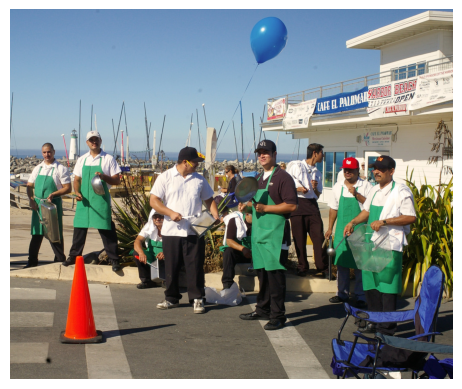

In [86]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('./images/873768102_7d931e5fa3_b.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("Off")
plt.show()

In [27]:
!cat ../balloon.yaml

# 設定圖檔路徑
path: Balloon Training Data/balloon  # 資料根目錄
train: images/train     # 訓練用資料集（相對於 path）
val: images/test       # 驗證用資料集（相對於 path）
test:                   # 測試用資料集（相對於 path，可省略）

# 物件類別設定
nc: 1           # 類別數量
names: ['balloon']  # 類別名稱

In [73]:
!python3 ../train.py --img-size 640 --batch 16 --epochs 50\
  --data ../balloon.yaml --weights ../yolov5s.pt


train: weights=../yolov5s.pt, cfg=, data=../balloon.yaml, hyp=../data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 6 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-187-g5ef69ef Python-3.9.12 torch-1.12.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_g

In [74]:
!ls ../runs/train/exp5/weights/

best.pt last.pt


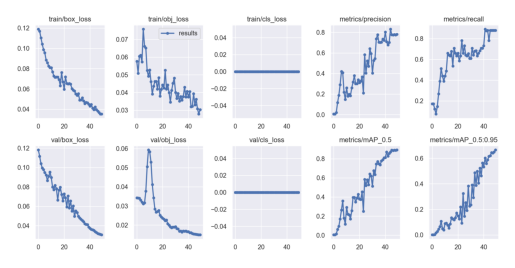

In [75]:
image = cv2.imread('../runs/train/exp5/results.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("Off")
plt.show()

In [83]:
!python ../detect.py --weight ../runs/train/exp5/weights/best.pt \
  --source ./images/873768102_7d931e5fa3_b.jpg --iou-thres 0.4 --conf-thres 0.7

detect: weights=['../runs/train/exp5/weights/best.pt'], source=./images/873768102_7d931e5fa3_b.jpg, data=../data/coco128.yaml, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.4, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-187-g5ef69ef Python-3.9.12 torch-1.12.0 CPU

Fusing layers... 
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /Users/c_shweng/Documents/yolov5/Balloon Training Data/images/873768102_7d931e5fa3_b.jpg: 544x640 1 balloon, 457.0ms
Speed: 1.6ms pre-process, 457.0ms inference, 0.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to ../runs/detect/exp5


In [84]:
!ls ../runs/detect/exp5/873768102_7d931e5fa3_b.jpg

../runs/detect/exp5/873768102_7d931e5fa3_b.jpg


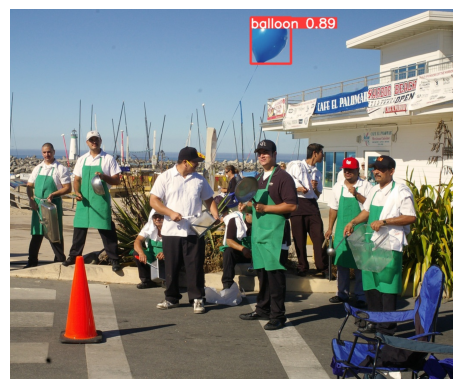

In [88]:
image = cv2.imread('../runs/detect/exp5/873768102_7d931e5fa3_b.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("Off")
plt.show()